In [ ]:
import cv2
import pathlib
import matplotlib.pyplot as plt
import PIL
import os
import tensorflow as tf

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Load and Preparing Datasets**

In [ ]:
path1='/content/drive/MyDrive/pest/train/aphids'
path2 ='/content/drive/MyDrive/pest/train/armyworm'
path3 = '/content/drive/MyDrive/pest/train/beetle'
path4 = '/content/drive/MyDrive/pest/train/bollworm'
path5 = '/content/drive/MyDrive/pest/train/grasshopper'
path6 = '/content/drive/MyDrive/pest/train/mites'
path7 = '/content/drive/MyDrive/pest/train/mosquito'
path8 = '/content/drive/MyDrive/pest/train/sawfly'
path9 = '/content/drive/MyDrive/pest/train/stem_borer'

data_dir1=pathlib.Path(path1)
data_dir2=pathlib.Path(path2)
data_dir3=pathlib.Path(path3)
data_dir4=pathlib.Path(path4)
data_dir5=pathlib.Path(path5)
data_dir6=pathlib.Path(path6)
data_dir7=pathlib.Path(path7)
data_dir8=pathlib.Path(path8)
data_dir9=pathlib.Path(path9)




dict_pest={
    'aphids':list(data_dir1.glob('*')),
    'armyworm':list(data_dir2.glob('*')),
    'beetle':list(data_dir3.glob('*')),
    'bollworm':list(data_dir4.glob('*')),
    'grasshopper':list(data_dir5.glob('*')),
    'mites':list(data_dir6.glob('*')),
    'mosquito':list(data_dir7.glob('*')),
    'sawfly':list(data_dir8.glob('*')),
    'stem_borer':list(data_dir9.glob('*'))
}

dict_pest_num={
    'aphids':0,
    'armyworm':1,
    'beetle':2,
    'bollworm':3,
    'grasshopper':4,
    'mites':5,
    'mosquito':6,
    'sawfly':7,
    'stem_borer':8
}

**###############**

In [ ]:
# list(data_dir1.glob('*'))
dict_pest['aphids']

In [ ]:
PIL.Image.open(str(dict_pest['aphids'][0]))

In [ ]:
img=cv2.imread(str(dict_pest['aphids'][0]))
img.shape,img

In [ ]:
plt.matshow(img)

**###########################**

In [ ]:
x=[]
y=[]
for key,path in dict_pest.items():
  for sbpth in path:
    img=cv2.imread(str(sbpth))
    img=cv2.resize(img,(180,180))
    x.append(img)
    y.append(dict_pest_num[key])


In [ ]:
import numpy as np
x_data=np.array(x)
x_data.shape

(2700, 180, 180, 3)

In [ ]:
y_data=np.array(y)
y_data.shape

(2700,)

In [ ]:
x_data[0]

array([[[127, 202, 170],
        [127, 202, 170],
        [127, 202, 170],
        ...,
        [115, 202, 164],
        [115, 200, 162],
        [115, 200, 162]],

       [[127, 202, 170],
        [127, 202, 170],
        [127, 202, 170],
        ...,
        [115, 202, 164],
        [115, 200, 162],
        [115, 200, 162]],

       [[127, 202, 170],
        [127, 202, 170],
        [127, 202, 170],
        ...,
        [115, 202, 164],
        [115, 200, 162],
        [115, 200, 162]],

       ...,

       [[116, 200, 165],
        [115, 199, 164],
        [115, 199, 164],
        ...,
        [109, 196, 158],
        [109, 196, 158],
        [109, 196, 158]],

       [[114, 201, 163],
        [113, 200, 162],
        [113, 200, 162],
        ...,
        [109, 196, 158],
        [109, 196, 158],
        [109, 196, 158]],

       [[114, 201, 163],
        [113, 200, 162],
        [113, 200, 162],
        ...,
        [109, 196, 158],
        [109, 196, 158],
        [109, 196, 158]]

In [ ]:
y_data[0:3700]

array([0, 0, 0, ..., 8, 8, 8])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1,random_state=0)

In [ ]:
x_train[0]

array([[[255, 249, 250],
        [255, 249, 250],
        [255, 249, 250],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[255, 249, 250],
        [255, 249, 250],
        [255, 249, 250],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[255, 249, 250],
        [255, 249, 250],
        [255, 249, 250],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       ...,

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [ 59, 131,  95],
        [ 57, 131,  95],
        [ 65, 142, 105]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [ 57, 129,  92],
        [ 51, 125,  89],
        [ 58, 135,  98]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [ 49, 120,  84],
        [ 46, 120,  84],
        [ 54, 130,  93]]

In [ ]:
x_train.shape 

(2430, 180, 180, 3)

In [ ]:
y_train.shape

(2430,)

In [ ]:
x_train_sc=x_train/225
x_test_sc= x_test/225
x_train_sc

array([[[[1.13333333, 1.10666667, 1.11111111],
         [1.13333333, 1.10666667, 1.11111111],
         [1.13333333, 1.10666667, 1.11111111],
         ...,
         [1.12      , 1.12      , 1.12      ],
         [1.12      , 1.12      , 1.12      ],
         [1.12      , 1.12      , 1.12      ]],

        [[1.13333333, 1.10666667, 1.11111111],
         [1.13333333, 1.10666667, 1.11111111],
         [1.13333333, 1.10666667, 1.11111111],
         ...,
         [1.12      , 1.12      , 1.12      ],
         [1.12      , 1.12      , 1.12      ],
         [1.12      , 1.12      , 1.12      ]],

        [[1.13333333, 1.10666667, 1.11111111],
         [1.13333333, 1.10666667, 1.11111111],
         [1.13333333, 1.10666667, 1.11111111],
         ...,
         [1.12      , 1.12      , 1.12      ],
         [1.12      , 1.12      , 1.12      ],
         [1.12      , 1.12      , 1.12      ]],

        ...,

        [[1.12      , 1.12      , 1.12      ],
         [1.12      , 1.12      , 1.12      ]

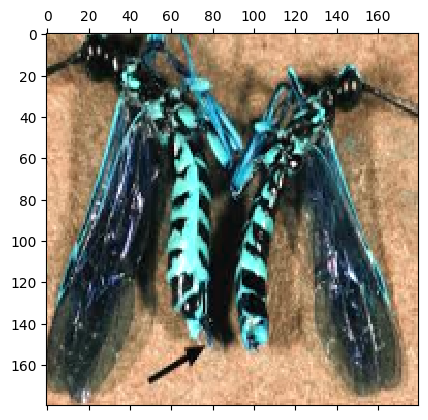

In [ ]:
plt.matshow(x_train_sc[2])

**Train Model**

In [ ]:
from tensorflow import keras

In [ ]:
model1=keras.Sequential([
                      #cnn
                        keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(180,180,3)),
                        keras.layers.MaxPool2D((2,2)),
                      
                        keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                        keras.layers.MaxPool2D((2,2)),
                      #Dense
                        keras.layers.Flatten(),  
                        keras.layers.Dense(64,activation='relu'),
                        keras.layers.Dense(9,activation='sigmoid')  
])
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model1.fit(x_train_sc,y_train,epochs=2,validation_split=0.10)

In [ ]:
model1.evaluate(x_test_sc,y_test)

9/9 [==============================] - 3s 328ms/step - loss: 0.0268 - accuracy: 0.9963


[0.026772744953632355, 0.9962962865829468]

In [ ]:
predict=model1.predict(x_test_sc[0:10])
predict

1/1 [==============================] - 0s 221ms/step


array([[9.71945465e-01, 9.97259080e-01, 9.99996543e-01, 3.40418518e-01,
        9.69299495e-01, 9.84790623e-01, 9.99139607e-01, 1.00000000e+00,
        9.74042237e-01],
       [3.76941621e-01, 9.76829827e-01, 9.92898524e-01, 9.99480605e-01,
        8.40784013e-01, 9.91474807e-01, 9.99999225e-01, 9.97937143e-01,
        1.22498773e-01],
       [9.99993980e-01, 9.99972582e-01, 9.99995947e-01, 9.99999166e-01,
        1.96769118e-01, 1.00000000e+00, 5.62737621e-02, 9.99998093e-01,
        9.99979496e-01],
       [1.03460580e-01, 9.99877334e-01, 1.00000000e+00, 1.21155925e-01,
        9.14235830e-01, 9.99848247e-01, 9.99688625e-01, 9.98180628e-01,
        9.89740729e-01],
       [5.05959213e-01, 2.42026225e-02, 8.69739532e-01, 9.97262478e-01,
        1.00000000e+00, 2.03789268e-02, 6.73508155e-04, 9.15030167e-02,
        3.60601756e-04],
       [1.93849027e-01, 9.71828878e-01, 1.00000000e+00, 9.77671266e-01,
        9.99998629e-01, 9.97786999e-01, 9.81640458e-01, 1.00000000e+00,
        9.9

In [ ]:
# for i in predict:
#   print(np.argmax(i))

In [ ]:
# y_test[0:10]


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


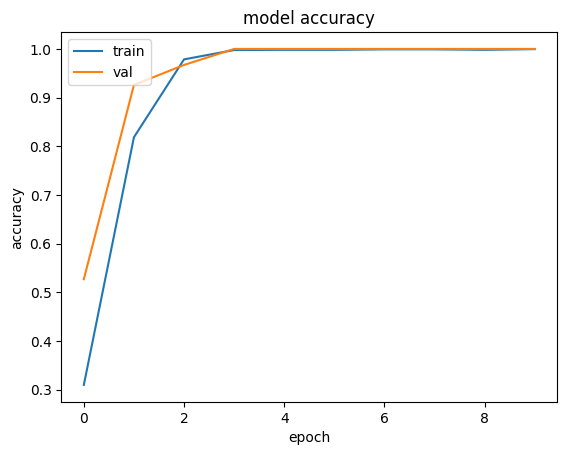

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

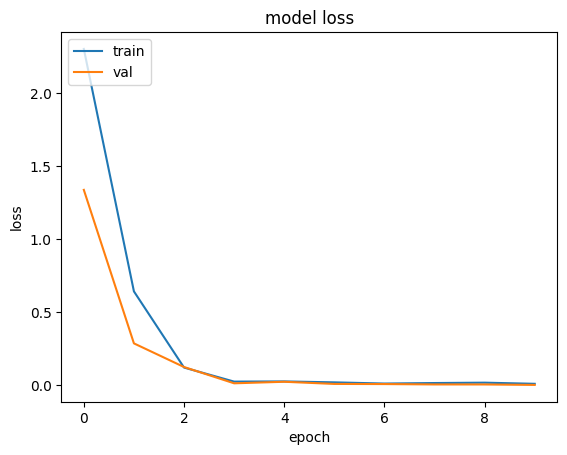

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Calculating Accuracy


In [ ]:
path1='/content/drive/MyDrive/pest/test/aphids'
path2 ='/content/drive/MyDrive/pest/test/armyworm'
path3 = '/content/drive/MyDrive/pest/test/beetle'
path4 = '/content/drive/MyDrive/pest/test/bollworm'
path5 = '/content/drive/MyDrive/pest/test/grasshopper'
path6 = '/content/drive/MyDrive/pest/test/mites'
path7 = '/content/drive/MyDrive/pest/test/mosquito'
path8 = '/content/drive/MyDrive/pest/test/sawfly'
path9 = '/content/drive/MyDrive/pest/test/stem_borer'

data_dir1=pathlib.Path(path1)
data_dir2=pathlib.Path(path2)
data_dir3=pathlib.Path(path3)
data_dir4=pathlib.Path(path4)
data_dir5=pathlib.Path(path5)
data_dir6=pathlib.Path(path6)
data_dir7=pathlib.Path(path7)
data_dir8=pathlib.Path(path8)
data_dir9=pathlib.Path(path9)




dict_pest={
    'aphids':list(data_dir1.glob('*')),
    'armyworm':list(data_dir2.glob('*')),
    'beetle':list(data_dir3.glob('*')),
    'bollworm':list(data_dir4.glob('*')),
    'grasshopper':list(data_dir5.glob('*')),
    'mites':list(data_dir6.glob('*')),
    'mosquito':list(data_dir7.glob('*')),
    'sawfly':list(data_dir8.glob('*')),
    'stem_borer':list(data_dir9.glob('*'))
}

dict_pest_num={
    'aphids':0,
    'armyworm':1,
    'beetle':2,
    'bollworm':3,
    'grasshopper':4,
    'mites':5,
    'mosquito':6,
    'sawfly':7,
    'stem_borer':8
}

In [ ]:
x=[]
y=[]
for key,path in dict_pest.items():
  for sbpth in path:
    img=cv2.imread(str(sbpth))
    img=cv2.resize(img,(180,180))
    x.append(img)
    y.append(dict_pest_num[key])

In [ ]:
import numpy as np
x_test=np.array(x)
x_test.shape

(450, 180, 180, 3)

In [ ]:
y_test=np.array(y)
y_test.shape

(450,)

In [ ]:
x_test_sc=x_test/225

In [ ]:
cnn.evaluate(x_test_sc,y_test)

15/15 [==============================] - 6s 406ms/step - loss: 0.3066 - accuracy: 0.9511


[0.306566059589386, 0.9511111378669739]

<!-- Saving the model -->

Model **Saveing**

In [ ]:
tf.keras.models.save_model(cnn,'my_model2.hdf5')